### 2. Análisis Exploratorio 

In [354]:
# Importamos las librerias a utilizar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [355]:
# Cargamos el dataset
df =pd.read_csv('D:/2024/HenryData/M6/Proyecto_Integrador/Analisis de mercado/df_limpio.csv')


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marca             205 non-null    object 
 1   Modelo            203 non-null    object 
 2   symboling         205 non-null    int64  
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

A continuación observaremos la distribución de los precios vehiculares: 
Se observa que la distribución del precio de los vehículos se encuentran sesgadas a la derecha, esto quiere decir que existen vehículos que pertenecem a una gama baja, pero que tambien exisiten vehículos que pertenencen a una gama alta.

Por otra parte tambien se obserbva en el diagrama de caja que existien valores fuera del bigote superior, estos valores estarían explicados por la existecia de vehículos de lujo, por lo que estarían ubicados por arriba del bigote y representan los outliers.

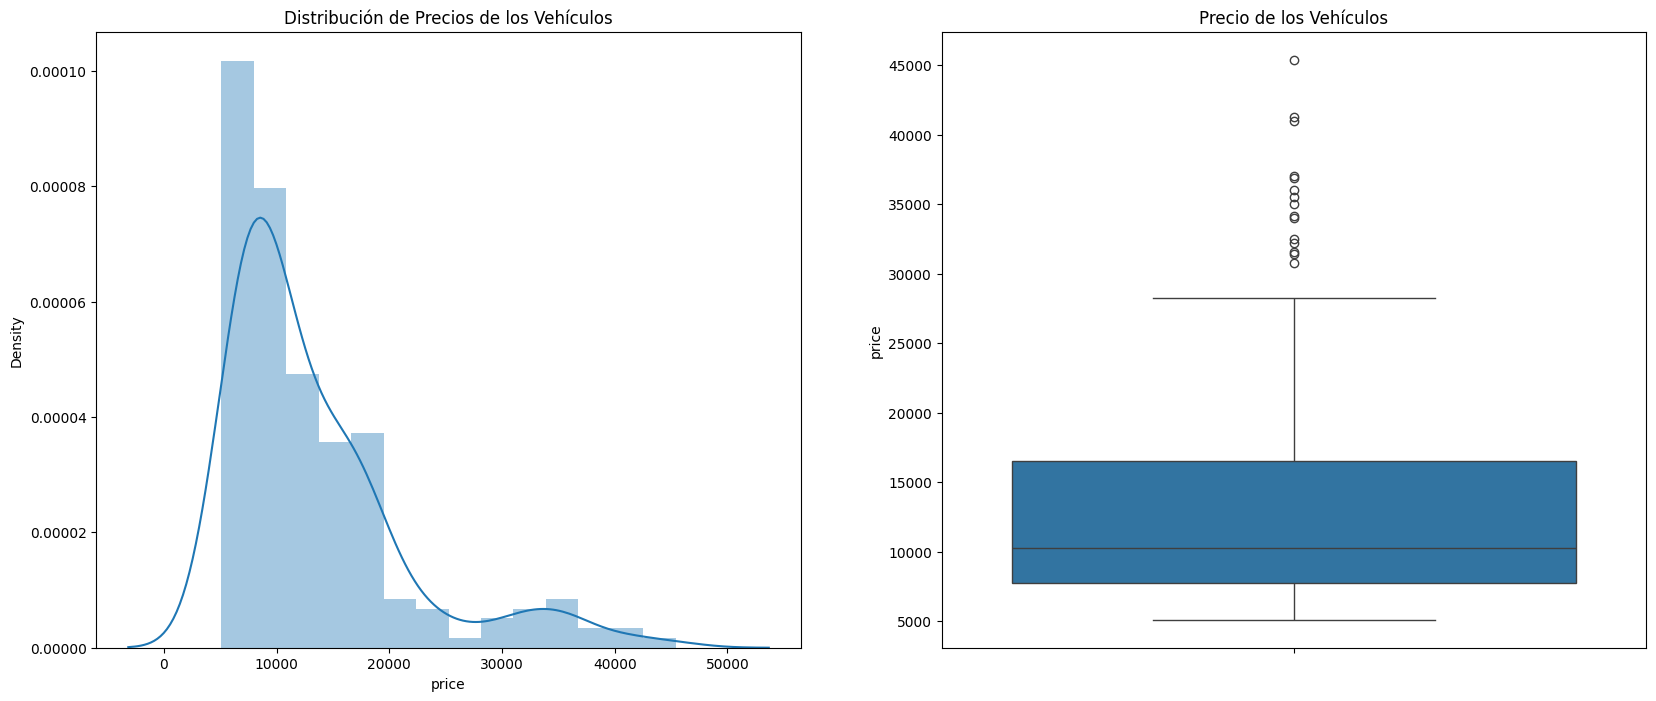

In [357]:
# Creamos la funcion para visualizar la distribución de precios de los vehículos
def distribucion_precios_cars():
    plt.style.use('default')

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    ax[0].set_title('Distribución de Precios de los Vehículos')
    sns.distplot(df.price, ax=ax[0])

    ax[1].set_title('Precio de los Vehículos')
    sns.boxplot(y=df.price, ax=ax[1])

    plt.show()

distribucion_precios_cars()

Siguiendo el análisis se procede a calcular la media de precios para dividir los datos en dos categorias, es decir en vehículos de alta gama o baja gama, teniendo como criterio la mediana de precios.

In [358]:
# Se realiza el calculo de la mediana de precios, para derterminar las categoria al cual pertenece el vehículo si es de alta gama o baja gama
mediana = df['price'].median().astype(int)
mediana

10295

In [359]:
# Calculo de la cantidad de vehículos que tienen precios superiores a la mediana
mayor_mediana = df[df['price']> mediana].shape[0]
print('Cant de vehículos con precio mayores a la mediana', mayor_mediana)

Cant de vehículos con precio mayores a la mediana 102


In [360]:
# Calculo de la cantidad de vehículos, con precios inferiores o iguales a la mediana
menor_mediana = df[df['price']<= mediana].shape[0]
print('Cantidad de vehículos con precio iguales o inferiores a la mediana', menor_mediana)

Cantidad de vehículos con precio iguales o inferiores a la mediana 103


In [361]:
# Creamos la columna ´gama´ donde 1 es para alta gama y 0 para baja gama
df['gama']=df['price'].apply(lambda x: 1 if x > mediana else 0 )

In [362]:
#Verificamos
print(df[['price','gama']].head())

     price  gama
0  13495.0     1
1  16500.0     1
2  16500.0     1
3  13950.0     1
4  17450.0     1


In [363]:
df.head()

,Marca,Modelo,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gama
0,Alfa Romero,giulia,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,Alfa Romero,stelvio,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,Alfa Romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,Audi,100 ls,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,Audi,100ls,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


### Análisis de las características de los vehículos de alta y baja gama

 De acuerdo a los objetivos del proyecto a continuación se describen las características que presentan los vehículos de gama alta y los de gama baja en nuestro mercado, a fin de abarcar todo los públicos objetivos ajustándose a toda la demanda y, en base a los datos analizados en el presente estudio.

### Características de los vehículos de alta gama:


En cuanto a las características de los vehículos de alta gama se ha observados que las Marcas como Peugeot, Volvo y Totoya tienen mayor presencia en el mercado de vehículos. Además existen 102 vehículos en esta gama, el tipo de combustible que usan son gas y diesel, el tipo de aspiracion del motor es estandar y turbo; el número de puertas para esta esta gama es de dos y cuatro, el tipo de carrocería del vehículo es: convertible, hatchback, sedan, wagon y hardtop; el tipo de motor es de: dohc, ohcv, ohc, rotor, l, ohcf y dohcv. El número de cilindros del motor es de: four, six, five, twelve, two y eight. 
Asimismmo, se ha relaizado el top 10 de los vehículos más caros del mercado el cual es de la Marca Buick, cuyo modelo es :regal sport coupe (turbo); valorizado en $ 45,400.00.

Por otra parte se ha observado de la Marca Toyota cuenta con vehículos en esta gama especificamente cuenta con 10 unidades que van desde 10,698.00 dolares como precio mínimo hasta $ 17,669.00 como precio máximo. 

In [364]:
# Filtrar por gama alta (alta=1)
df_gama_alta = df[df['gama'] == 1]

# Crear la tabla dinámica para gama alta
tabla_gama_alta = pd.pivot_table(
    df_gama_alta,
    index='Marca',                       # Agrupar por Marca
    values='price',                      # Trabajar con la columna 'price'
    aggfunc=['count', 'min', 'max'],     # Contar vehículos, y calcular precio mínimo y máximo
    margins=True,                        # Incluir totales
    margins_name='Total'                 # Renombrar los totales como 'Total'
)
# Mostrar tabla dinámica
print("Tabla dinámica para gama alta (1):")
print(tabla_gama_alta)

Tabla dinámica para gama alta (1):
            count      min      max
            price    price    price
Marca                              
Alfa Romero     3  13495.0  16500.0
Audi            7  13950.0  23875.0
BMW             8  16430.0  41315.0
Buick           8  25552.0  45400.0
Dodge           1  12964.0  12964.0
Honda           2  10345.0  12945.0
Isuzu           1  11048.0  11048.0
Jaguar          3  32250.0  36000.0
Mazda           9  10595.0  18344.0
Mercury         1  16503.0  16503.0
Mitsubishi      3  12629.0  14869.0
Nissan          6  13499.0  19699.0
Peugeot        11  11900.0  18150.0
Plymouth        1  12764.0  12764.0
Porsche         5  22018.0  37028.0
Saab            6  11850.0  18620.0
Subaru          2  11259.0  11694.0
Toyota         10  10698.0  17669.0
Volkswagen      4  11595.0  13845.0
Volvo          11  12940.0  22625.0
Total         102  10345.0  45400.0


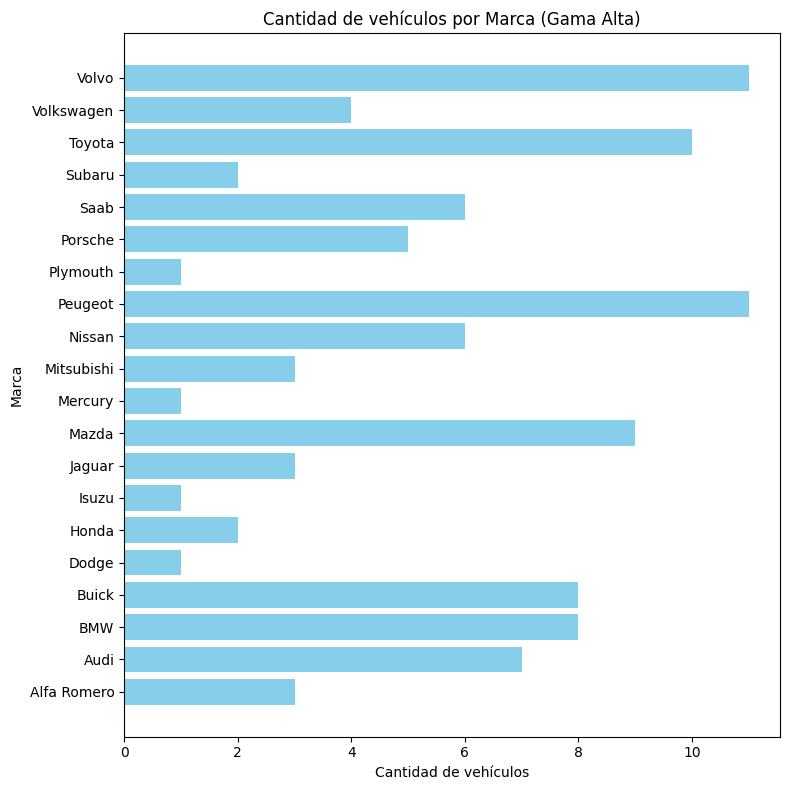

In [365]:
# Filtrar por gama alta (alta=1)
df_gama_alta = df[df['gama'] == 1]

# Agrupar por 'Marca' para gama alta y calcular cantidad de vehículos y precio promedio
tabla_gama_alta = df_gama_alta.groupby('Marca').agg(
    cantidad_vehiculos=('price', 'count'),
).reset_index()

# Crear gráfico para gama alta
fig, ax1 = plt.subplots(figsize=(8, 8))  # Un gráfico

# Gráfico de barras horizontales para gama alta
ax1.barh(tabla_gama_alta['Marca'], tabla_gama_alta['cantidad_vehiculos'], color='skyblue', label='Cantidad de vehículos')

# Configurar título y etiquetas
ax1.set_title('Cantidad de vehículos por Marca (Gama Alta)')
ax1.set_xlabel('Cantidad de vehículos')
ax1.set_ylabel('Marca')


# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [366]:
# Caracterisitcas de los vehículos de alta gama
colum_no_num = df_gama_alta.select_dtypes(exclude=['number']).columns
valor_unico_gama = df_gama_alta[colum_no_num].apply(lambda x: x.unique())
print(valor_unico_gama)

Marca             [Alfa Romero, Audi, BMW, Dodge, Honda, Isuzu, ...
Modelo            [giulia, stelvio, Quadrifoglio, 100 ls, 100ls,...
fueltype                                              [gas, diesel]
aspiration                                             [std, turbo]
doornumber                                              [two, four]
carbody             [convertible, hatchback, sedan, wagon, hardtop]
drivewheel                                          [rwd, fwd, 4wd]
enginelocation                                        [front, rear]
enginetype                 [dohc, ohcv, ohc, rotor, l, ohcf, dohcv]
cylindernumber                [four, six, five, twelve, two, eight]
fuelsystem                 [mpfi, mfi, 2bbl, spfi, 4bbl, idi, spdi]
dtype: object


## Características de los vehículos de baja gama

En las características de los vehículos de baja gama se ha observados que las Marcas como Toyota, Nissan y Honda tienen mayor presencia en el mercado de vehículos, siendo Toyota el lider de esta gama con 22 vehículos cuyos precios van desde 5,348.00 dolares hasta 9,989.00 dolares. 

En este gama existen 103 vehículos, que presentan las siguientes características: el tipo de combustible que usan son gas y diesel, el tipo de aspiracion del motor es estandar y turbo; el número de puertas para esta esta gama es de dos y cuatro, el tipo de carrocería del vehículo es: hatchback, sedan, wagon y hardtop; el tipo de motor es de: l, ohc, ohcf y dohc. El número de cilindros del motor es de: three y four. 

Asimismmo, se ha relaizado el top 10 de los vehículos más baratos del mercado el cual es de la Marca Subaru, cuyo modelo es : nan; valorizado en $ 5,118.00.

Por otra parte se ha observado de la Marca Toyota cuenta con vehículos tanto en la gama alta como en la gama baja teniendo un total de 32 vehículos en el mercado. 

In [367]:
# Filtrar por gama baja (baja=0)
df_gama_baja = df[df['gama'] == 0]

# Crear la tabla dinámica para gama baja
tabla_gama_baja = pd.pivot_table(
    df_gama_baja,
    index='Marca',                       # Agrupar por Marca
    values='price',                      # Trabajar con la columna 'price'
    aggfunc=['count', 'min', 'max'],     # Contar vehículos, y calcular precio mínimo y máximo
    margins=True,                        # Incluir totales
    margins_name='Total'                 # Renombrar los totales como 'Total'
)
# Mostrar tabla dinámica
print("\nTabla dinámica para gama baja (0):")
print(tabla_gama_baja)


Tabla dinámica para gama baja (0):
           count     min      max
           price   price    price
Marca                            
Chevrolet      3  5151.0   6575.0
Dodge          8  5572.0   8921.0
Honda         11  5399.0  10295.0
Isuzu          3  6785.0   8916.5
Mazda          8  5195.0  10245.0
Mitsubishi    10  5389.0   9959.0
Nissan        12  5499.0   9549.0
Plymouth       6  5572.0   8921.0
Renault        2  9295.0   9895.0
Subaru        10  5118.0  10198.0
Toyota        22  5348.0   9989.0
Volkswagen     8  7775.0   9995.0
Total        103  5118.0  10295.0


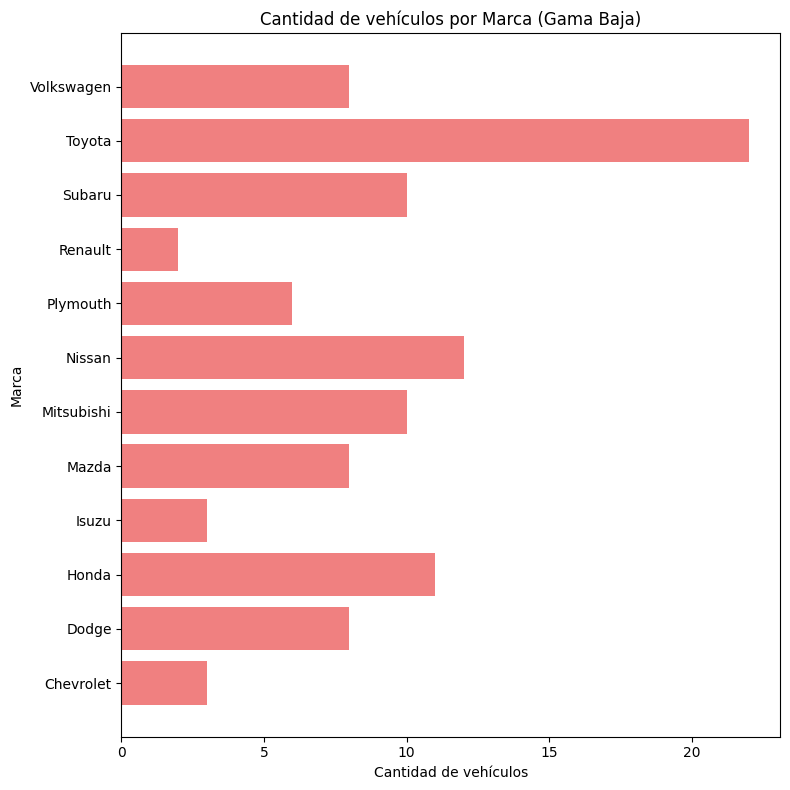

In [368]:
# Filtrar por gama baja (baja=0)

df_gama_baja = df[df['gama'] == 0]


# Agrupar por 'Marca' para gama baja y calcular cantidad de vehículos y precio promedio
tabla_gama_baja = df_gama_baja.groupby('Marca').agg(
    cantidad_vehiculos=('price', 'count'),

).reset_index()

# Crear gráficos para gama alta y gama baja
fig, ax2 = plt.subplots(figsize=(8,8))  # Dos gráficos uno debajo del otro

# Gráfico para gama baja
ax2.barh(tabla_gama_baja['Marca'], tabla_gama_baja['cantidad_vehiculos'], color='lightcoral', label='Cantidad de vehículos')
ax2.set_title('Cantidad de vehículos por Marca (Gama Baja)')
ax2.set_ylabel('Marca')
ax2.set_xlabel('Cantidad de vehículos')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [369]:
# Caracterisitcas de los vehículos de baja gama
colum_no_num = df_gama_baja.select_dtypes(exclude=['number']).columns
valor_unico_gamab = df_gama_baja[colum_no_num].apply(lambda x: x.unique())
print(valor_unico_gamab)

Marca             [Chevrolet, Dodge, Honda, Isuzu, Mazda, Mitsub...
Modelo            [impala, monte carlo, vega 2300, rampage, chal...
fueltype                                              [gas, diesel]
aspiration                                             [std, turbo]
doornumber                                              [two, four]
carbody                          [hatchback, sedan, wagon, hardtop]
drivewheel                                          [fwd, rwd, 4wd]
enginelocation                                              [front]
enginetype                                     [l, ohc, ohcf, dohc]
cylindernumber                                        [three, four]
fuelsystem                            [2bbl, mpfi, 1bbl, spdi, idi]
dtype: object


In [370]:
# Obtener los 10 autos más caros
top_10_most_expensive = df.nlargest(10, 'price')

# Obtener los 10 autos más baratos
top_10_cheapest = df.nsmallest(10, 'price')

# Función para centrar el contenido de la tabla
def mostrar_tabla_centrada(df):
    # Usamos Styler para aplicar el estilo
    return df.style.set_table_attributes("style='margin-left: auto; margin-right: auto;'").set_properties(**{
        'text-align': 'center'  # Centramos el texto de las celdas
    })

# Mostrar las tablas centradas
print("Top 10 de Autos más caros:")
display(mostrar_tabla_centrada(top_10_most_expensive))

print("\nTop 10 de Autos más baratos:")
display(mostrar_tabla_centrada(top_10_cheapest))

Top 10 de Autos más caros:


,Marca,Modelo,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gama
74,Buick,regal sport coupe (turbo),1,gas,std,two,hardtop,rwd,front,112.000000,199.200000,72.000000,55.400000,3715,ohcv,eight,304,mpfi,3.800000,3.350000,8.000000,184,4500,14,16,45400.000000,1
16,BMW,x5,0,gas,std,two,sedan,rwd,front,103.500000,193.800000,67.900000,53.700000,3380,ohc,six,209,mpfi,3.620000,3.390000,8.000000,182,5400,16,22,41315.000000,1
73,Buick,century special,0,gas,std,four,sedan,rwd,front,120.900000,208.100000,71.700000,56.700000,3900,ohcv,eight,308,mpfi,3.800000,3.350000,8.000000,184,4500,14,16,40960.000000,1
128,Porsche,boxter,3,gas,std,two,convertible,rwd,rear,89.500000,168.900000,65.000000,51.600000,2800,ohcf,six,194,mpfi,3.740000,2.900000,9.500000,207,5900,17,25,37028.000000,1
17,BMW,x3,0,gas,std,four,sedan,rwd,front,110.000000,197.000000,70.900000,56.300000,3505,ohc,six,209,mpfi,3.620000,3.390000,8.000000,182,5400,15,20,36880.000000,1
49,Jaguar,xk,0,gas,std,two,sedan,rwd,front,102.000000,191.700000,70.600000,47.800000,3950,ohcv,twelve,326,mpfi,3.540000,2.760000,11.500000,262,5000,13,17,36000.000000,1
48,Jaguar,xf,0,gas,std,four,sedan,rwd,front,113.000000,199.600000,69.600000,52.800000,4066,dohc,six,258,mpfi,3.630000,4.170000,8.100000,176,4750,15,19,35550.000000,1
72,Buick,skylark,3,gas,std,two,convertible,rwd,front,96.600000,180.300000,70.500000,50.800000,3685,ohcv,eight,234,mpfi,3.460000,3.100000,8.300000,155,4750,16,18,35056.000000,1
71,Buick,opel isuzu deluxe,-1,gas,std,four,sedan,rwd,front,115.600000,202.600000,71.700000,56.500000,3740,ohcv,eight,234,mpfi,3.460000,3.100000,8.300000,155,4750,16,18,34184.000000,1
127,Porsche,cayenne,3,gas,std,two,hardtop,rwd,rear,89.500000,168.900000,65.000000,51.600000,2756,ohcf,six,194,mpfi,3.740000,2.900000,9.500000,207,5900,17,25,34028.000000,1



Top 10 de Autos más baratos:


,Marca,Modelo,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gama
138,Subaru,nan,2,gas,std,two,hatchback,fwd,front,93.700000,156.900000,63.400000,53.700000,2050,ohcf,four,97,2bbl,3.620000,2.360000,9.000000,69,4900,31,36,5118.000000,0
18,Chevrolet,impala,2,gas,std,two,hatchback,fwd,front,88.400000,141.100000,60.300000,53.200000,1488,l,three,61,2bbl,2.910000,3.030000,9.500000,48,5100,47,53,5151.000000,0
50,Mazda,rx3,1,gas,std,two,hatchback,fwd,front,93.100000,159.100000,64.200000,54.100000,1890,ohc,four,91,2bbl,3.030000,3.150000,9.000000,68,5000,30,31,5195.000000,0
150,Toyota,corona mark ii,1,gas,std,two,hatchback,fwd,front,95.700000,158.700000,63.600000,54.500000,1985,ohc,four,92,2bbl,3.050000,3.030000,9.000000,62,4800,35,39,5348.000000,0
76,Mitsubishi,mirage,2,gas,std,two,hatchback,fwd,front,93.700000,157.300000,64.400000,50.800000,1918,ohc,four,92,2bbl,2.970000,3.230000,9.400000,68,5500,37,41,5389.000000,0
32,Honda,civic,1,gas,std,two,hatchback,fwd,front,93.700000,150.000000,64.000000,52.600000,1837,ohc,four,79,1bbl,2.910000,3.070000,10.100000,60,5500,38,42,5399.000000,0
89,Nissan,versa,1,gas,std,two,sedan,fwd,front,94.500000,165.300000,63.800000,54.500000,1889,ohc,four,97,2bbl,3.150000,3.290000,9.400000,69,5200,31,37,5499.000000,0
21,Dodge,rampage,1,gas,std,two,hatchback,fwd,front,93.700000,157.300000,63.800000,50.800000,1876,ohc,four,90,2bbl,2.970000,3.230000,9.410000,68,5500,37,41,5572.000000,0
118,Plymouth,fury iii,1,gas,std,two,hatchback,fwd,front,93.700000,157.300000,63.800000,50.800000,1918,ohc,four,90,2bbl,2.970000,3.230000,9.400000,68,5500,37,41,5572.000000,0
51,Mazda,glc deluxe,1,gas,std,two,hatchback,fwd,front,93.100000,159.100000,64.200000,54.100000,1900,ohc,four,91,2bbl,3.030000,3.150000,9.000000,68,5000,31,38,6095.000000,0


In [371]:
# Observamos la cantidad de vehículos por marca
cant_Marcas = df['Marca'].value_counts()
cant_Marcas

Marca
Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
BMW             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa Romero     3
Renault         2
Mercury         1
Name: count, dtype: int64

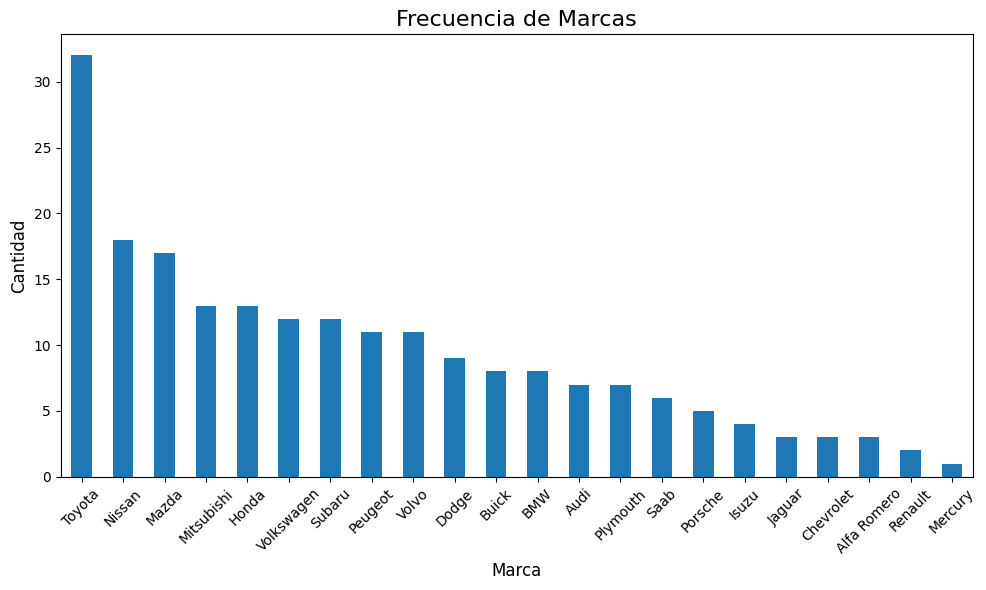

In [372]:
# Crear un gráfico de barras
plt.figure(figsize=(10,6))
cant_Marcas.plot(kind='bar')

# Título y etiquetas
plt.title('Frecuencia de Marcas', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas de las marcas para que no se sobrepongan
plt.tight_layout()       # Ajustar el gráfico para mejor visualización
plt.show()

In [373]:
max_precio = df['price'].max()  # Obtener el valor máximo del precio

# Obtener todas las características (marca, modelo, etc.) asociadas al precio máximo
caracteristicas_max_precio = df[df['price'] == max_precio]

# Mostrar los resultados
print(caracteristicas_max_precio)

    Marca                     Modelo  symboling fueltype aspiration  \
74  Buick  regal sport coupe (turbo)          1      gas        std   

   doornumber  carbody drivewheel enginelocation  wheelbase  carlength  \
74        two  hardtop        rwd          front      112.0      199.2   

    carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
74      72.0       55.4        3715       ohcv          eight         304   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
74       mpfi        3.8    3.35               8.0         184     4500   

    citympg  highwaympg    price  gama  
74       14          16  45400.0     1  


### Balanceo de los datos

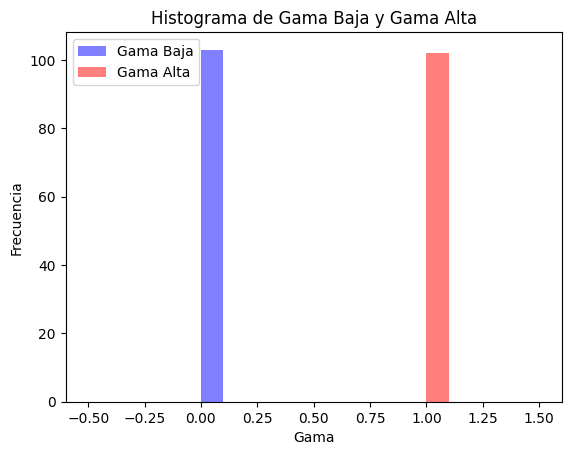

In [374]:
# Graficar
plt.hist(df_gama_baja['gama'], bins=10, alpha=0.5, label='Gama Baja', color='blue')
plt.hist(df_gama_alta['gama'], bins=10, alpha=0.5, label='Gama Alta', color='red')

# Etiquetas y título
plt.xlabel('Gama')
plt.ylabel('Frecuencia')
plt.title('Histograma de Gama Baja y Gama Alta')

# Añadir la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

Sobremuestreo de la clase minoritaria (Oversampling)

In [375]:
from sklearn.utils import resample
gama_alta_upsampled = resample(df_gama_alta, 
                               replace=True,     # Permitir duplicar
                               n_samples=103,    # Match con la clase mayoritaria
                               random_state=42)

df_balanceado = pd.concat([df_gama_baja, gama_alta_upsampled])

In [376]:
df_balanceado.shape

(206, 27)

In [377]:
df.head()

,Marca,Modelo,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gama
0,Alfa Romero,giulia,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,Alfa Romero,stelvio,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,Alfa Romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,Audi,100 ls,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,Audi,100ls,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [378]:
df=df_balanceado

### A continuación analizamos la correlación de los atributos númericos frente al precio

In [379]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
columnas_numericas

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gama'],
      dtype='object')

In [380]:
numeric_columns1 = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gama']]

<Axes: >

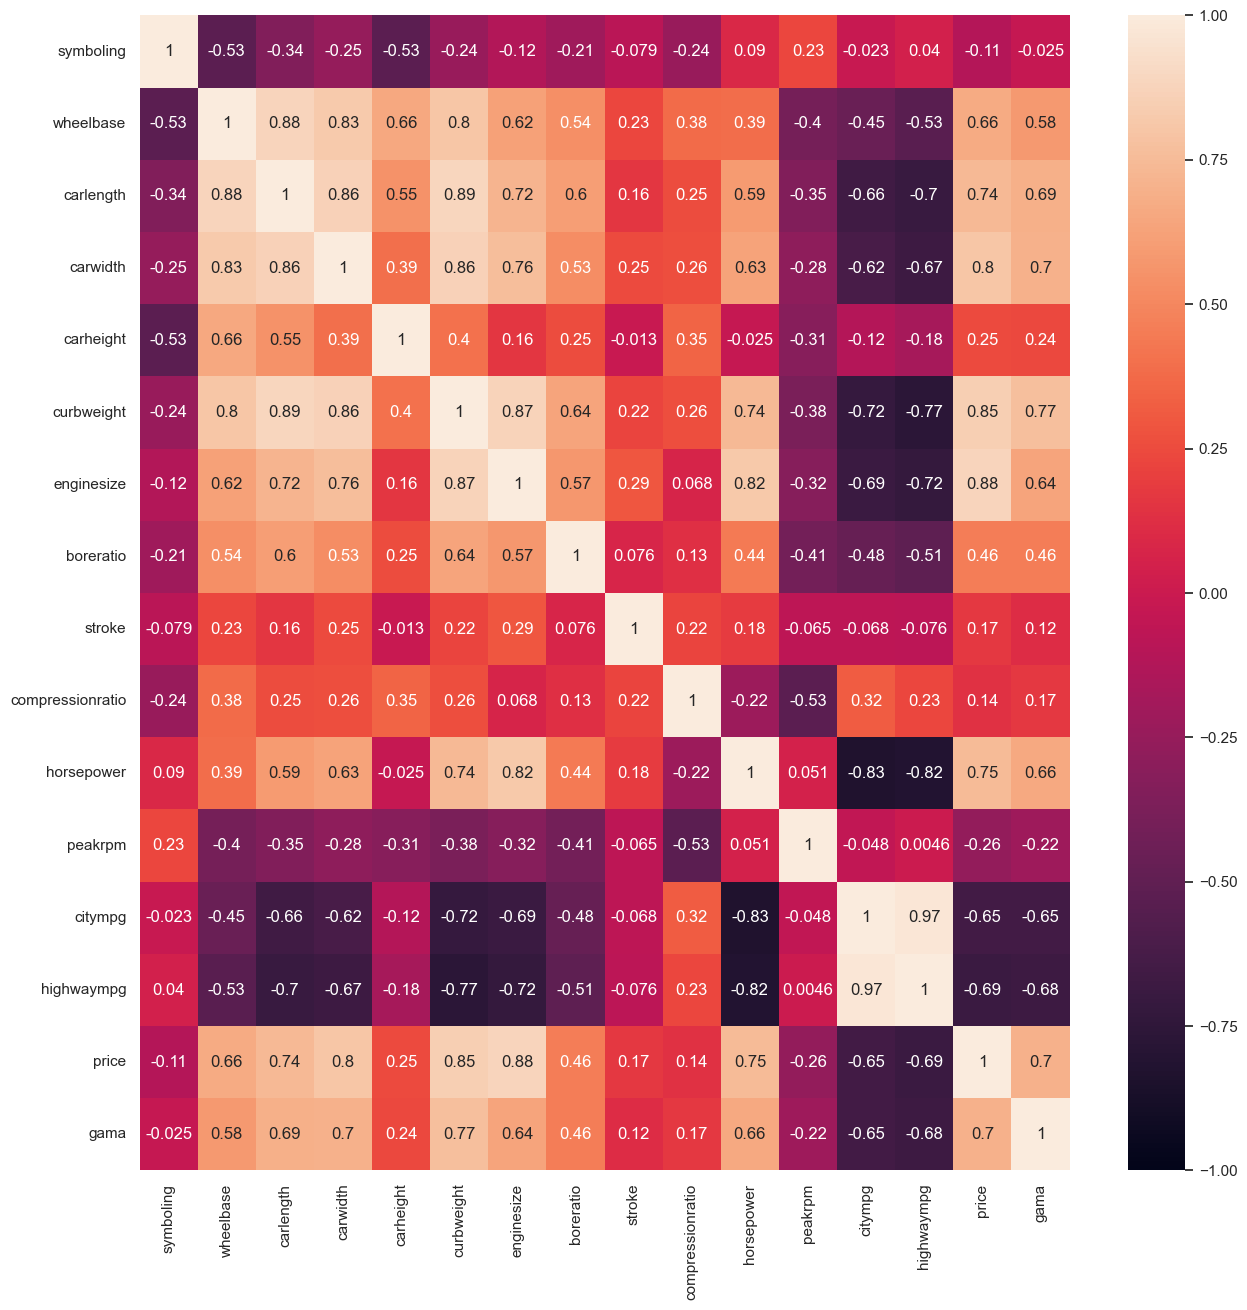

In [381]:
cor_atribu_num = numeric_columns1.corr()

sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(cor_atribu_num, annot=True, vmax=1, vmin=-1)

Los atributos que presentan una mayor correlación con el precio son:

*wheelbase*: Distancia entre ejes

*carlength*: Longitud del vehículo

*carwidth*: Ancho del vehículo

*curbweight*: Peso del vehículo sib carga ni coupantes

*enginesize*: El tamaño del motor 

*boreratio*: Relación diametro/carrera de los pistones del motor

*horsepower*: Potencia del vehículo, en caballos de fuerza (HP)

*gama*: categorización del vehículo en alta/baja

Variable que presentan Multicolinealidad:
citympg y highwaympg

In [382]:
df.head()

,Marca,Modelo,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gama
18,Chevrolet,impala,2,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151.0,0
19,Chevrolet,monte carlo,1,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.0,0
20,Chevrolet,vega 2300,0,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6575.0,0
21,Dodge,rampage,1,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.0,0
22,Dodge,challenger se,1,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6377.0,0


In [383]:
# Eliminamos las columnas redundantes 
drop_column=['symboling', 'carheight',
      'stroke', 'compressionratio',
       'peakrpm', 'citympg', 'highwaympg']
df=df.drop(columns=drop_column)
df.head()

,Marca,Modelo,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,gama
18,Chevrolet,impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,1488,l,three,61,2bbl,2.91,48,5151.0,0
19,Chevrolet,monte carlo,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,1874,ohc,four,90,2bbl,3.03,70,6295.0,0
20,Chevrolet,vega 2300,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,1909,ohc,four,90,2bbl,3.03,70,6575.0,0
21,Dodge,rampage,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,1876,ohc,four,90,2bbl,2.97,68,5572.0,0
22,Dodge,challenger se,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,1876,ohc,four,90,2bbl,2.97,68,6377.0,0


Analisamos los atributos categoricos (no númericos) 

In [384]:
# Obtenemos las columnas no númericas
colum_no_num = df.select_dtypes(exclude=['number']).columns
colum_no_num


Index(['Marca', 'Modelo', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [385]:
print('Marca :\n', df['Marca'].value_counts(),'/n')


Marca :
 Marca
Toyota         33
Nissan         20
Peugeot        19
Volkswagen     16
Honda          14
Mazda          12
Mitsubishi     12
Subaru         11
Plymouth        8
Dodge           8
Volvo           8
BMW             7
Saab            7
Audi            7
Alfa Romero     6
Buick           6
Isuzu           5
Chevrolet       3
Renault         2
Jaguar          2
Name: count, dtype: int64 /n


In [386]:
print('Modelo :\n', df['Modelo'].value_counts(),'/n')


Modelo :
 Modelo
504        10
corona      6
corolla     5
rabbit      5
dasher      4
           ..
nv200       1
note        1
juke        1
leaf        1
skylark     1
Name: count, Length: 122, dtype: int64 /n


In [387]:
print('fueltype: Tipo de combustible :\n', df['fueltype'].value_counts(),'/n')


fueltype: Tipo de combustible :
 fueltype
gas       180
diesel     26
Name: count, dtype: int64 /n


In [388]:
print('aspiration :\n', df['aspiration'].value_counts(),'/n')
print('doornumber :\n', df['doornumber'].value_counts(),'/n')


aspiration :
 aspiration
std      168
turbo     38
Name: count, dtype: int64 /n
doornumber :
 doornumber
four    123
two      83
Name: count, dtype: int64 /n


In [389]:
print('carbody :\n', df['carbody'].value_counts(),'/n')
print('drivewheel :\n', df['drivewheel'].value_counts(),'/n')


carbody :
 carbody
sedan          101
hatchback       63
wagon           27
convertible      9
hardtop          6
Name: count, dtype: int64 /n
drivewheel :
 drivewheel
fwd    125
rwd     75
4wd      6
Name: count, dtype: int64 /n


In [390]:
print('enginelocation :\n', df['enginelocation'].value_counts(),'/n')
print('enginetype :\n', df['enginetype'].value_counts(),'/n')


enginelocation :
 enginelocation
front    206
Name: count, dtype: int64 /n
enginetype :
 enginetype
ohc      144
l         20
dohc      15
ohcv      15
ohcf      11
rotor      1
Name: count, dtype: int64 /n


In [391]:
print('cylindernumber :\n', df['cylindernumber'].value_counts(),'/n')
print('fuelsystem :\n', df['fuelsystem'].value_counts(),'/n')

cylindernumber :
 cylindernumber
four     165
six       26
five      10
eight      3
three      1
two        1
Name: count, dtype: int64 /n
fuelsystem :
 fuelsystem
mpfi    90
2bbl    67
idi     26
1bbl    11
spdi     9
spfi     2
4bbl     1
Name: count, dtype: int64 /n


In [392]:
# codificamos las varibales de tipo objetivo
#LE=LabelEncoder()
#for i in object_cols:
 #   df[i]=df[[i]].apply(LE.fit_transform)

In [393]:
df.head()

,Marca,Modelo,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,gama
18,Chevrolet,impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,1488,l,three,61,2bbl,2.91,48,5151.0,0
19,Chevrolet,monte carlo,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,1874,ohc,four,90,2bbl,3.03,70,6295.0,0
20,Chevrolet,vega 2300,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,1909,ohc,four,90,2bbl,3.03,70,6575.0,0
21,Dodge,rampage,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,1876,ohc,four,90,2bbl,2.97,68,5572.0,0
22,Dodge,challenger se,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,1876,ohc,four,90,2bbl,2.97,68,6377.0,0


In [394]:
# Lista de columnas categóricas que deseas convertir en variables dummy
convert = ['Marca', 'Modelo', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df_dummies = pd.get_dummies(df[convert], drop_first=True).astype(int)


In [395]:
# Eliminar las columnas originales que ya fueron convertidas
df = df.drop(columns=convert)

In [400]:
df = pd.concat([df, df_dummies], axis=1)

In [401]:
import pandas as pd; pd.set_option('display.max_columns', 100)
df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gama,Marca_Audi,Marca_BMW,Marca_Buick,Marca_Chevrolet,Marca_Dodge,Marca_Honda,Marca_Isuzu,Marca_Jaguar,Marca_Mazda,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Plymouth,Marca_Renault,Marca_Saab,Marca_Subaru,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Modelo_100ls,Modelo_1131 deluxe sedan,Modelo_12tl,Modelo_144ea,Modelo_145e (sw),Modelo_244dl,Modelo_245,Modelo_246,Modelo_304,Modelo_4000,Modelo_411 (sw),Modelo_5 gtl,Modelo_5000,Modelo_504,Modelo_504 (sw),Modelo_505s turbo diesel,Modelo_604sl,Modelo_626,Modelo_99e,Modelo_99gle,Modelo_99le,Modelo_D-Max,...,Modelo_rampage,Modelo_regal sport coupe (turbo),Modelo_rogue,Modelo_rx-4,Modelo_rx-7 gs,Modelo_rx2 coupe,Modelo_rx3,Modelo_satellite custom (sw),Modelo_skyhawk,Modelo_skylark,Modelo_starlet,Modelo_stelvio,Modelo_super beetle,Modelo_teana,Modelo_tercel,Modelo_titan,Modelo_trezia,Modelo_tribeca,Modelo_type 3,Modelo_valiant,Modelo_vega 2300,Modelo_versa,Modelo_x3,Modelo_xf,Modelo_z4,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
18,88.4,141.1,60.3,1488,61,2.91,48,5151.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
19,94.5,155.9,63.6,1874,90,3.03,70,6295.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
20,94.5,158.8,63.6,1909,90,3.03,70,6575.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
21,93.7,157.3,63.8,1876,90,2.97,68,5572.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
22,93.7,157.3,63.8,1876,90,2.97,68,6377.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 18 to 191
Columns: 174 entries, wheelbase to fuelsystem_spfi
dtypes: float64(5), int32(165), int64(4)
memory usage: 148.9 KB


In [403]:
print(df.columns)

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'gama', 'Marca_Audi',
       ...
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=174)


In [404]:
# Guardamos el archivo
df.to_csv('../Analisis de mercado/df_model.csv', index=False)